In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
# Read in data 

# B < 0, I > 0
df1 = pd.read_csv("2025-03-11/connor_2025-03-11_1SS9.csv",skiprows=20,header=0)
# B < 0, I < 0
df2 = pd.read_csv("2025-03-12/connor_2025-03-12_1SS9.csv",skiprows=20,header=0)
# B > 0, I < 0
df3 = pd.read_csv("2025-03-18/connor_2025-03-18_1SS9.csv",skiprows=20,header=0)
# B > 0, I > 0
df4 = pd.read_csv("2025-03-19/connor_2025-03-19_2SS9.csv",skiprows=20,header=0)

In [3]:
# Slim data by removing extra columns

df1 = df1.drop(['T_err','MM1_error','MM2_error','MM3_error','MM4_reading','MM4_error'],axis='columns')
df2 = df2.drop(['T_err','MM1_error','MM2_error','MM3_error','MM4_reading','MM4_error'],axis='columns')
df3 = df3.drop(['T_err','MM1_error','MM2_error','MM3_error','MM4_reading','MM4_error'],axis='columns')
df4 = df4.drop(['T_err','MM1_error','MM2_error','MM3_error','MM4_reading','MM4_error'],axis='columns')

In [4]:
# Name columns

df1.columns = ['t','T','V13','V24','I56']
df2.columns = ['t','T','V13','V24','I56']
df3.columns = ['t','T','V13','V24','I56']
df4.columns = ['t','T','V13','V24','I56']

In [5]:
# Functions for interpolating

def V13(df, T):
    a = scipy.interpolate.interp1d(df['T'],df['V13'])
    return a(T)

def V24(df, T):
    a = scipy.interpolate.interp1d(df['T'],df['V24'])
    return a(T)

Text(0.5, 0, 'T [K]')

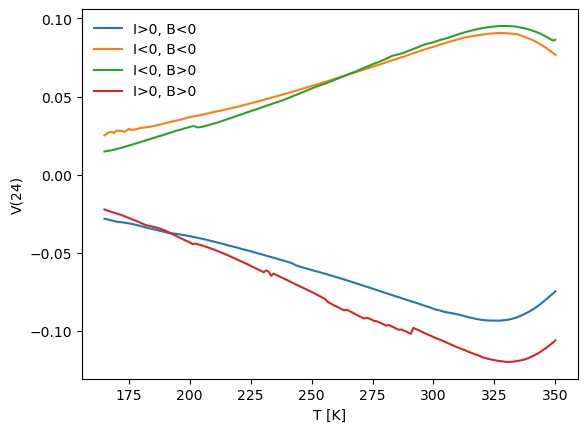

In [6]:
# Plot V_{24} from all datasets

temp = np.linspace(165,350,185)
plt.plot(temp,V24(df1,temp),label='I>0, B<0')
plt.plot(temp,V24(df2,temp),label='I<0, B<0')
plt.plot(temp,V24(df3,temp),label='I<0, B>0')
plt.plot(temp,V24(df4,temp),label='I>0, B>0')
plt.legend(frameon=False)

plt.ylabel('V(24)')
plt.xlabel('T [K]')

Text(0.5, 0, 'T [K]')

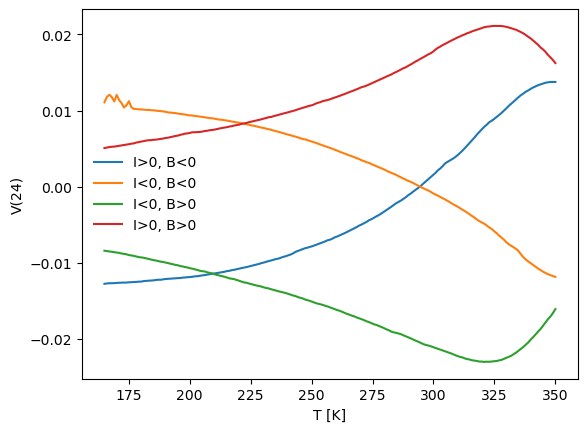

In [7]:
# Plot V_{13} from all datasets

temp = np.linspace(165,350,185)
plt.plot(temp,V13(df1,temp),label='I>0, B<0')
plt.plot(temp,V13(df2,temp),label='I<0, B<0')
plt.plot(temp,V13(df3,temp),label='I<0, B>0')
plt.plot(temp,V13(df4,temp),label='I>0, B>0')
plt.legend(frameon=False)

plt.ylabel('V(24)')
plt.xlabel('T [K]')

Text(0.5, 0, 'T [K]')

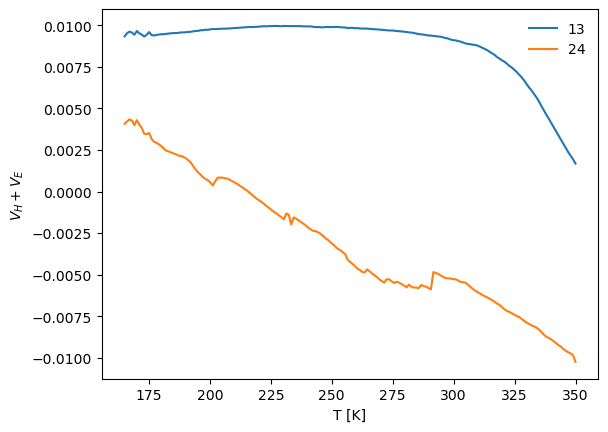

In [8]:
# Correct to V_H + V_E from Linberg's Eq 17

temp = np.linspace(165,350,185)
E1 = V13(df4,temp)
E2 = V13(df3,temp)
E3 = V13(df2,temp)
E4 = V13(df1,temp)

V13_corr = (E1 - E2 + E3 - E4)/4.0

F1 = V24(df4,temp)
F2 = V24(df3,temp)
F3 = V24(df2,temp)
F4 = V24(df1,temp)

V24_corr = (F1 - F2 + F3 - F4)/4.0

plt.plot(temp,V13_corr,label='13')
plt.plot(temp,V24_corr,label='24')
plt.legend(frameon=False)

plt.ylabel('$V_H + V_E$')
plt.xlabel('T [K]')

In [9]:
# I really thought those would match